In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [20]:
#reading a File
hb=pd.read_csv(r'C:\Users\ATHUL KRISHNAN\Desktop\haberman.csv')

In [21]:
#Show top 5 Elements of Dataset
hb.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [22]:
#Dimensions of Dataset
hb.shape #It Shows the Dataset have 306 Datapoints and 4 Features


(306, 4)

In [23]:
#To show Columns of Dataset
hb.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [24]:
#To Check Null Values present in the Dataset
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [25]:
#Determine Balance or Imbalance Dataset / Determining Number of DataPoints per Class
print(hb["status"].value_counts()) #It is a Imbalnced Dataset

1    225
2     81
Name: status, dtype: int64


# Pair-plot

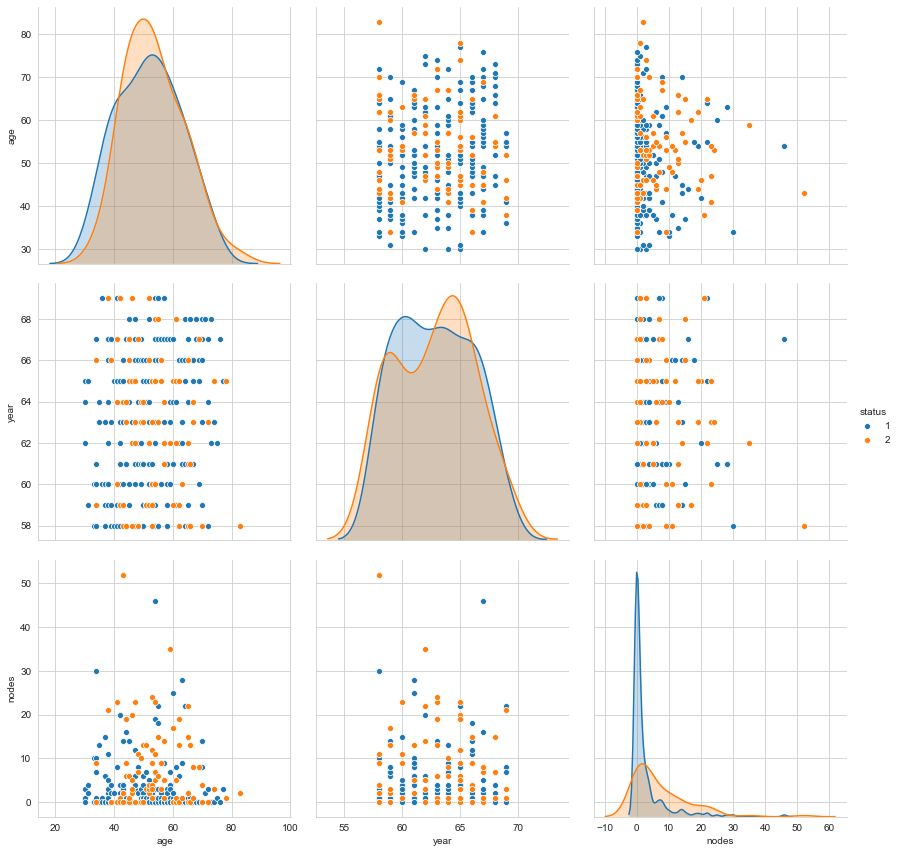

In [26]:
#Pair Plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hb,hue="status",vars=["age","year","nodes"],size=4);
plt.show();

**Observation(s) From Pair Plot :** 

In this Case Pair Plot is not useful in selecting right features because Datapoints of all the features is overlapping
But from this we can have following conclusions -:
* Breast Cancer occurs during the age group of 25-80.
* Most of the Patients have axial nodes less than or equal to 30.


In [27]:
#Seperating the Data based on feature "Status"
hb_1=hb.loc[hb["status"]==1]
hb_2=hb.loc[hb["status"]==2]

#  1D Plot

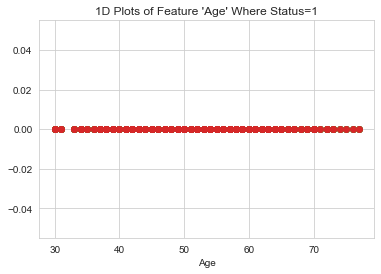

************************************************************


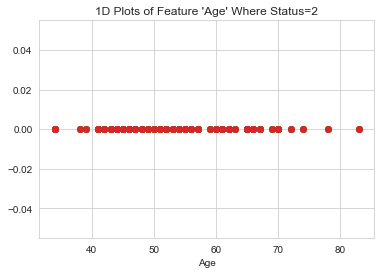

************************************************************


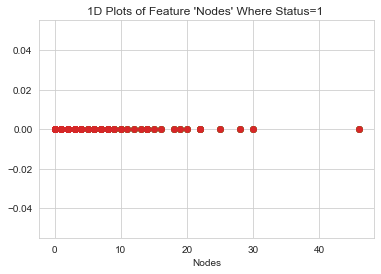

************************************************************


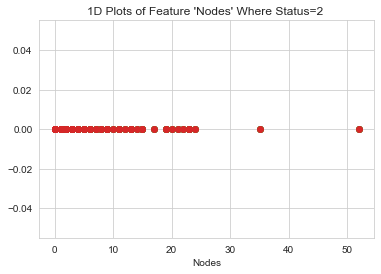

In [28]:
#1D Plots  - tells us about the distribution of Features
plt.plot(hb_1["age"],np.zeros_like(hb_1),"o")
plt.title("1D Plots of Feature 'Age' Where Status=1")
plt.xlabel("Age")
plt.show()
print("*"*60)
plt.plot(hb_2["age"],np.zeros_like(hb_2),"o")
plt.title("1D Plots of Feature 'Age' Where Status=2")
plt.xlabel("Age")
plt.show()
print("*"*60)

plt.plot(hb_1["nodes"],np.zeros_like(hb_1),"o")
plt.title("1D Plots of Feature 'Nodes' Where Status=1 ")
plt.xlabel("Nodes")
plt.show()
print("*"*60)
plt.plot(hb_2["nodes"],np.zeros_like(hb_2),"o")
plt.title("1D Plots of Feature 'Nodes' Where Status=2 ")
plt.xlabel("Nodes")
plt.show()

#  Univariate Analysis

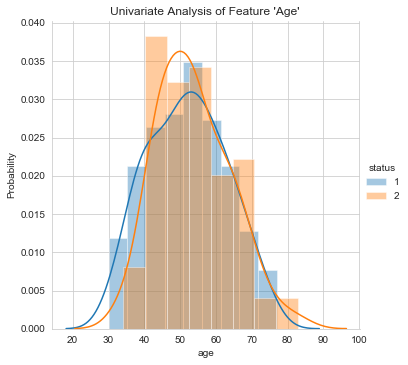

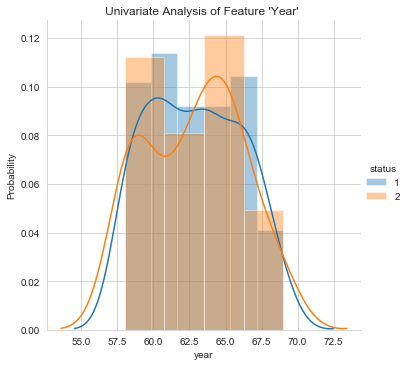

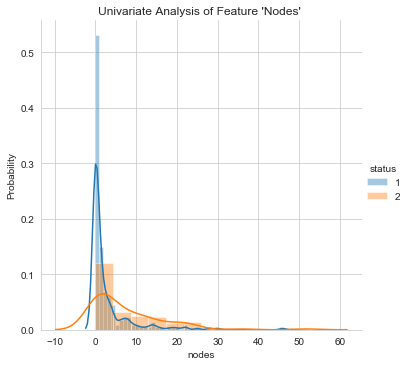

In [29]:
#Univariate Analysis

sns.FacetGrid(hb,hue="status",height=5)\
   .map(sns.distplot,"age")\
   .add_legend()
plt.ylabel("Probability")
plt.title("Univariate Analysis of Feature 'Age' ")
plt.show()


sns.FacetGrid(hb,hue="status",height=5)\
   .map(sns.distplot,"year")\
   .add_legend()
plt.ylabel("Probability")
plt.title("Univariate Analysis of Feature 'Year' ")
plt.show()


sns.FacetGrid(hb,hue="status",height=5)\
   .map(sns.distplot,"nodes")\
   .add_legend()
plt.ylabel("Probability")
plt.title("Univariate Analysis of Feature 'Nodes' ")
plt.show()

**Observation(s) From Univariate Analysis :** 

1. In Probability vs Age Plot 
   * Patients whose age group is between 40 to 60 has slightly large tendency to  die in 5 years.
   

2. In Probability vs Year Plot 
   * Patients whose perform their operation between 1958 -1962 has large tendency to survive for more than 5 years.
 
 
3. In Probability vs Nodes Plot
   * Patients who have nodes between 0 to 4 have large tendency to survive for more than 5 years.
 


#  PDF & CDF of Feature 'Age' where Status=1 

Text(0.5, 1.0, "PDF & CDF of Feature 'Age' where Status=1")

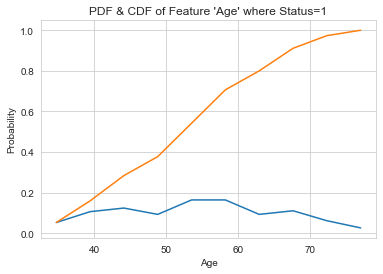

In [30]:
#CDF vs PDF
counts,bin_edges=np.histogram(hb_1["age"],bins=10,density=True)
pdf=counts/(sum(counts))

#Compute CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("Age")
plt.ylabel("Probability")
plt.title("PDF & CDF of Feature 'Age' where Status=1")

**Observation(s):**

Note : In this Case Staus =1(i.e Patient Will  Survive for more than 5 years )

In PDF 
 * About 20% of data have age values lies between 50 and 60.

In CDF
* 70% of Age having a value less than 60.   




# PDF & CDF of Feature 'Age' where Status=2

Text(0.5, 1.0, "PDF & CDF of Feature 'Age' where Status=2 ")

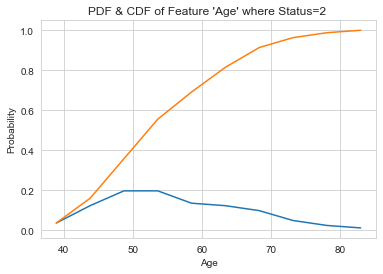

In [31]:
#CDF vs PDF
counts,bin_edges=np.histogram(hb_2["age"],bins=10,density=True)
pdf=counts/(sum(counts))
#Compute CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("Age")
plt.ylabel("Probability")
plt.title("PDF & CDF of Feature 'Age' where Status=2 ")

**Observation(s):**
 
Note : In this Case Staus =2(i.e Patient Will not Survive for more than 5 years )

In PDF 
 * About 10% of data have age values lies between 60 and 70.

In CDF
* 90% of Age having a value less than 70.
   


# CDF & PDF of Feature 'Nodes' where Status=1"

Text(0.5, 1.0, "CDF & PDF of Feature 'Nodes' where Status=1")

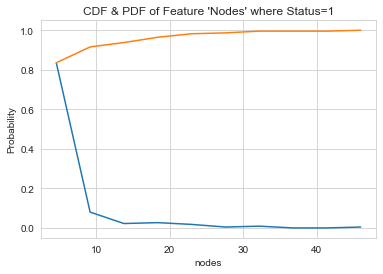

In [32]:
#CDF vs PDF
counts,bin_edges=np.histogram(hb_1["nodes"],bins=10,density=True)
pdf=counts/(sum(counts))

#Compute CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("nodes")
plt.ylabel("Probability")
plt.title("CDF & PDF of Feature 'Nodes' where Status=1")

**Observation(s):**
 
Note : In this Case Staus =1(i.e Patient Will Survive for more than 5 years )

In PDF 
 * About 10% of data have nodes values between 15 and 45.

In CDF
* 95% of Nodes having a value less than 20.

# PDF & CDF of Feature 'Nodes' where Status=2

Text(0.5, 1.0, "PDF & CDF of Feature 'Nodes' where Status=2")

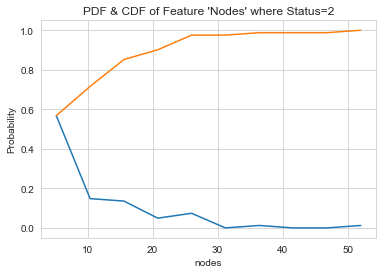

In [33]:
#CDF vs PDF
counts,bin_edges=np.histogram(hb_2["nodes"],bins=10,density=True)
pdf=counts/(sum(counts))

#Compute CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("nodes")
plt.ylabel("Probability")
plt.title("PDF & CDF of Feature 'Nodes' where Status=2")

**Observation(s):**
 
Note : In this Staus =2 (i.e Patient Will not Survive for more than 5 years )

In PDF 
* Around 10% of data have node values between  20 and 30.

In CDF
* 95% of Nodes having a value less than 25.


# Mean,Median,Std Deviation,Quantiles & MAD

In [34]:
#Means 
print("Mean")
print("-"*50)
print(np.mean(hb_1))
print("*"*50)
print(np.mean(hb_2))

#Std Deviation 
print("\nStd Dev")
print("-"*50)
print(np.std(hb_1))
print("*"*50)
print(np.std(hb_2))

#Median
print("\nMedian")
print("-"*50)
print(np.median(hb_1["age"]))
print(np.median(hb_1["year"]))
print(np.median(hb_1["nodes"]))
print("*"*50)
print(np.median(hb_2["age"]))
print(np.median(hb_2["year"]))
print(np.median(hb_2["nodes"]))

#Quantilies
print("\n Quantiles")
print("-"*50)
print(np.percentile(hb_1["age"],np.arange(0,100,25)))
print(np.percentile(hb_1["nodes"],np.arange(0,100,25)))
print("*"*50)
print(np.percentile(hb_2["age"],np.arange(0,100,25)))
print(np.percentile(hb_2["nodes"],np.arange(0,100,25)))

#MAD
print("\n Mean Absolute Deviation ")
print("-"*50)
from statsmodels import robust
print(robust.mad(hb_1["age"]))
print(robust.mad(hb_1["nodes"]))
print("*"*50)
print(robust.mad(hb_2["age"]))
print(robust.mad(hb_2["nodes"]))

Mean
--------------------------------------------------
age       52.017778
year      62.862222
nodes      2.791111
status     1.000000
dtype: float64
**************************************************
age       53.679012
year      62.827160
nodes      7.456790
status     2.000000
dtype: float64

Std Dev
--------------------------------------------------
age       10.987655
year       3.215745
nodes      5.857258
status     0.000000
dtype: float64
**************************************************
age       10.104182
year       3.321424
nodes      9.128776
status     0.000000
dtype: float64

Median
--------------------------------------------------
52.0
63.0
0.0
**************************************************
53.0
63.0
4.0

 Quantiles
--------------------------------------------------
[30. 43. 52. 60.]
[0. 0. 0. 3.]
**************************************************
[34. 46. 53. 61.]
[ 0.  1.  4. 11.]

 Mean Absolute Deviation 
--------------------------------------------------
13.3

**Observation(s):**

1.People who survived for more than 5 years
  * Mean Age is 52
  * Mean Nodes is ~3.
  * Standard Deviation in Age is 10.98 
  * Standard Deviation in Nodes is 5.85(~6) 
  * Mean and Median of age are same hence they are free from outliers.
  * Mean and Median of nodes are different hence there  is a chance for presence of outliers.
   
2.People who died within 5 years
  * Mean Age is ~54
  * Mean Nodes is ~7.
  * Standard Deviation in Age is 10.10 
  * Standard Deviation in Nodes is 9.12(~9).
  * Mean and Median of age are same hence they are free from outliers.
  * Mean and Median of nodes are different hence there  is a chance for presence of outliers.




# Box Plot

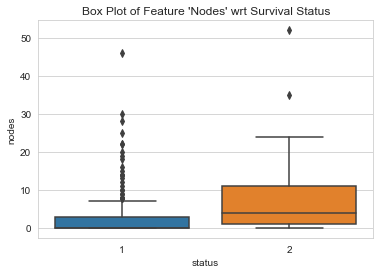

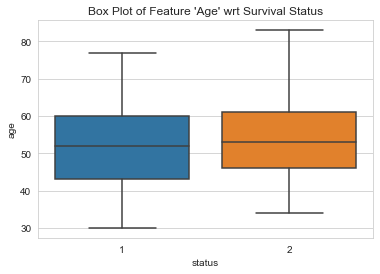

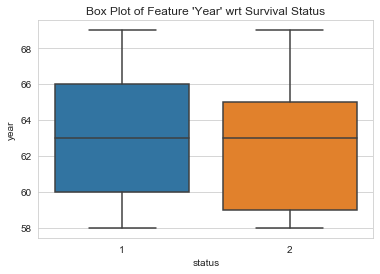

In [35]:
#Box Plot
sns.boxplot(x="status",y="nodes",data=hb)
plt.title("Box Plot of Feature 'Nodes' wrt Survival Status")
plt.show()
sns.boxplot(x="status",y="age",data=hb)
plt.title("Box Plot of Feature 'Age' wrt Survival Status")
plt.show()
sns.boxplot(x="status",y="year",data=hb)
plt.title("Box Plot of Feature 'Year' wrt Survival Status")
plt.show()


**Observation(s):**
* Patients having less nodes have a high chance of surviving for more than 5 years.
* There is a chance of presence of outliers in nodes column.

# Violin Plot

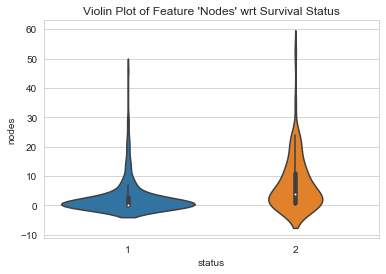

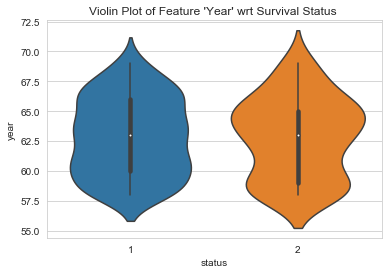

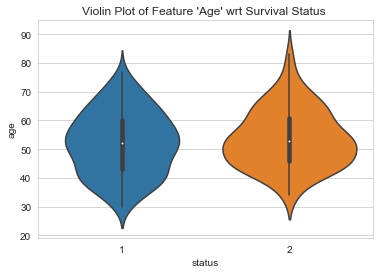

In [36]:
#Violin Plot
sns.violinplot(x="status",y="nodes",data=hb)
plt.title("Violin Plot of Feature 'Nodes' wrt Survival Status")
plt.show()
sns.violinplot(x="status",y="year",data=hb)
plt.title("Violin Plot of Feature 'Year' wrt Survival Status ")
plt.show()
sns.violinplot(x="status",y="age",data=hb)
plt.title("Violin Plot of Feature 'Age' wrt Survival Status ")
plt.show()

**Observation(s):**
* Patients having less nodes have a high chance of surviving for more than 5 years.


# Summary of Major Interpretations

* Breast Cancer occurs during the age group of 25-80. (from Pair Plot)
* Most of the Patients have axial nodes less than or equal to 30.(from Pair Plot).
* Patients whose high age group (i.e 40 to 60) has slightly large tendency to  die in 5 years.(From Univariate Analysis)
* Patients who have nodes between 0 to 4 have large tendency to survive for more 
  than 5 years.(From Univariate Analysis,Box Plot,Violin PLot)